In [1]:
using CSV, DataFrames, Polynomials, Plots

In [2]:
# Read data from CSV file
# Strip spaces from column names
df = CSV.read("series.csv", DataFrame)
rename!(df, Symbol.(strip.(string.(names(df)), ' ')))

Row,xs,ys1,ys2,ys3
,Int64,Int64,Int64,Int64
1,0,5,5,5
2,1,9,12,14
3,2,13,25,41
4,3,17,44,98
5,4,21,69,197
6,5,25,100,350
7,6,29,137,569
8,7,33,180,866
9,8,37,229,1253


In [3]:
# Extract columns from DataFrame
xs = df.xs
ys = df.ys3
println(xs, "\n", ys, "\n")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[5, 14, 41, 98, 197, 350, 569, 866, 1253, 1742, 2345, 3074, 3941]



In [4]:
# Perform cubic regression for ys
pf = fit(xs, ys, 3)
cfs_r = reverse(coeffs(pf))
cfs_fmt = [
  round(c, digits=2) for c in cfs_r]

println("Coefficients (a, b, c, d) for ys:")
println(cfs_fmt, "\n")

Coefficients (a, b, c, d) for ys:
[2.0, 3.0, 4.0, 5.0]



In [5]:
# Generate Series for Plotting
xp = range(minimum(xs), maximum(xs), length=100)
yp = pf.(xp)

100-element Vector{Float64}:
    4.999999999999759
    5.5324874085202485
    6.174499819127723
    6.947407963936715
    7.8725825750617595
    8.971394384617389
   10.265214124718138
   11.77541252747854
   13.523360325013133
   15.53042824943644
   17.817987032863005
   20.40740740740736
   23.320060105184037
    ⋮
 2816.2592592592578
 2908.2371093858687
 3002.205108940645
 3098.184628655703
 3196.1970392631547
 3296.2637114951162
 3398.4060160837016
 3502.645323761026
 3609.003005259203
 3717.5004313103477
 3828.1589726465754
 3940.9999999999995

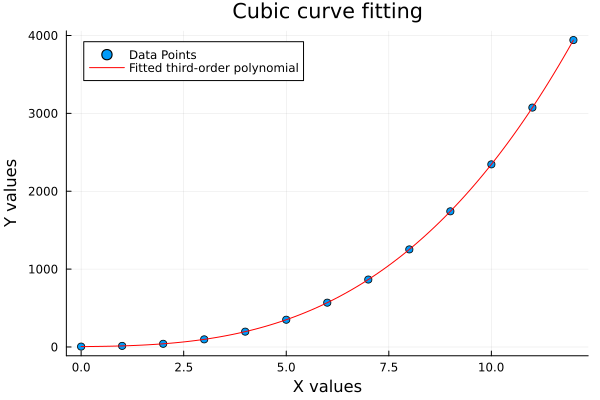

In [6]:
# Plotting
scatter(xs, ys,
  label="Data Points")
plot!(xp, yp, color=:red,
  label="Fitted third-order polynomial")
xlabel!("X values")
ylabel!("Y values")
title!("Cubic curve fitting")